# Group No - 15

### Assignment 2 - Bayesian Network for Cryotherapy Data
The cryotherapy data contains details of patients who took this treatment with the following attributes: Sex, Age, Time, Number of warts, Type, Area and the result of treatment (1 successful and 0 not successful).

#### Group Members

1. KOSHTI PRAVIN PRAKASH   (2020fc04406)
2. DIPALI THAKUR DHANDE  (2020fc04818)
3. SHWETA PATEL (2020fc04414)
4. AMIT SHARMA  (2020fc04812)
5. VIKRAM SINGH (2020fc04293)


### Import required libraries

import pandas as pd
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 

import seaborn as sns
import matplotlib.pyplot as plt

### Read the Data and check prerequisites for the data.

In [2]:
df = pd.read_excel('Cryotherapy.xlsx')
print("Dataframe info before the binning ",df.shape)
print("Dataframe info before the binning \n",df)

Dataframe info before the binning  (90, 7)
Dataframe info before the binning 
     sex  age   Time  Number_of_Warts  Type  Area  Result_of_Treatment
0     1   35  12.00                5     1   100                    0
1     1   29   7.00                5     1    96                    1
2     1   50   8.00                1     3   132                    0
3     1   32  11.75                7     3   750                    0
4     1   67   9.25                1     1    42                    0
..  ...  ...    ...              ...   ...   ...                  ...
85    2   34  12.00                3     3    95                    0
86    2   20   3.50                6     1    75                    1
87    2   35   8.25                8     3   100                    0
88    1   24  10.75               10     1    20                    1
89    1   19   8.00                8     1   160                    1

[90 rows x 7 columns]


In [3]:
df.info()

# There are columns which has contineous values. 
# Later we need to convert these values into different binnings for our Bayesian Network

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  90 non-null     int64  
 1   age                  90 non-null     int64  
 2   Time                 90 non-null     float64
 3   Number_of_Warts      90 non-null     int64  
 4   Type                 90 non-null     int64  
 5   Area                 90 non-null     int64  
 6   Result_of_Treatment  90 non-null     int64  
dtypes: float64(1), int64(6)
memory usage: 5.0 KB


In [4]:
df.isnull().sum()

# There is no null value present in dataset attributes. We dont need to filter out the null values.

sex                    0
age                    0
Time                   0
Number_of_Warts        0
Type                   0
Area                   0
Result_of_Treatment    0
dtype: int64

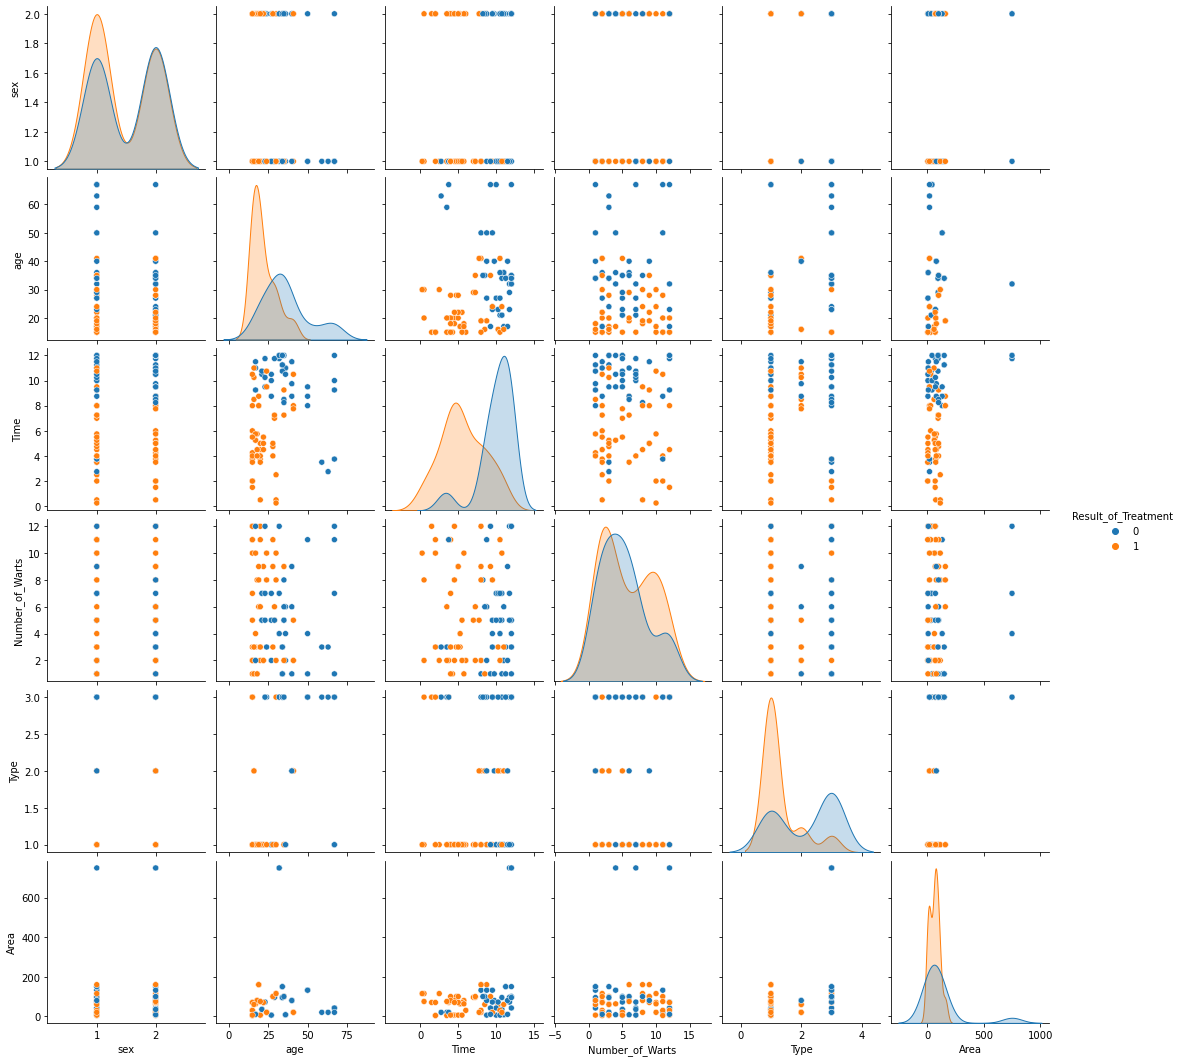

In [5]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=df, hue = 'Result_of_Treatment')

### Split the data and create Decision tree classifier

In [6]:
colms = ['sex', 'age', 'Time', 'Number_of_Warts', 'Type', 'Area']

X_train, X_test, Y_train, Y_test = train_test_split(df[colms], df['Result_of_Treatment'], random_state=0)

DecisionTreeClassifier Created


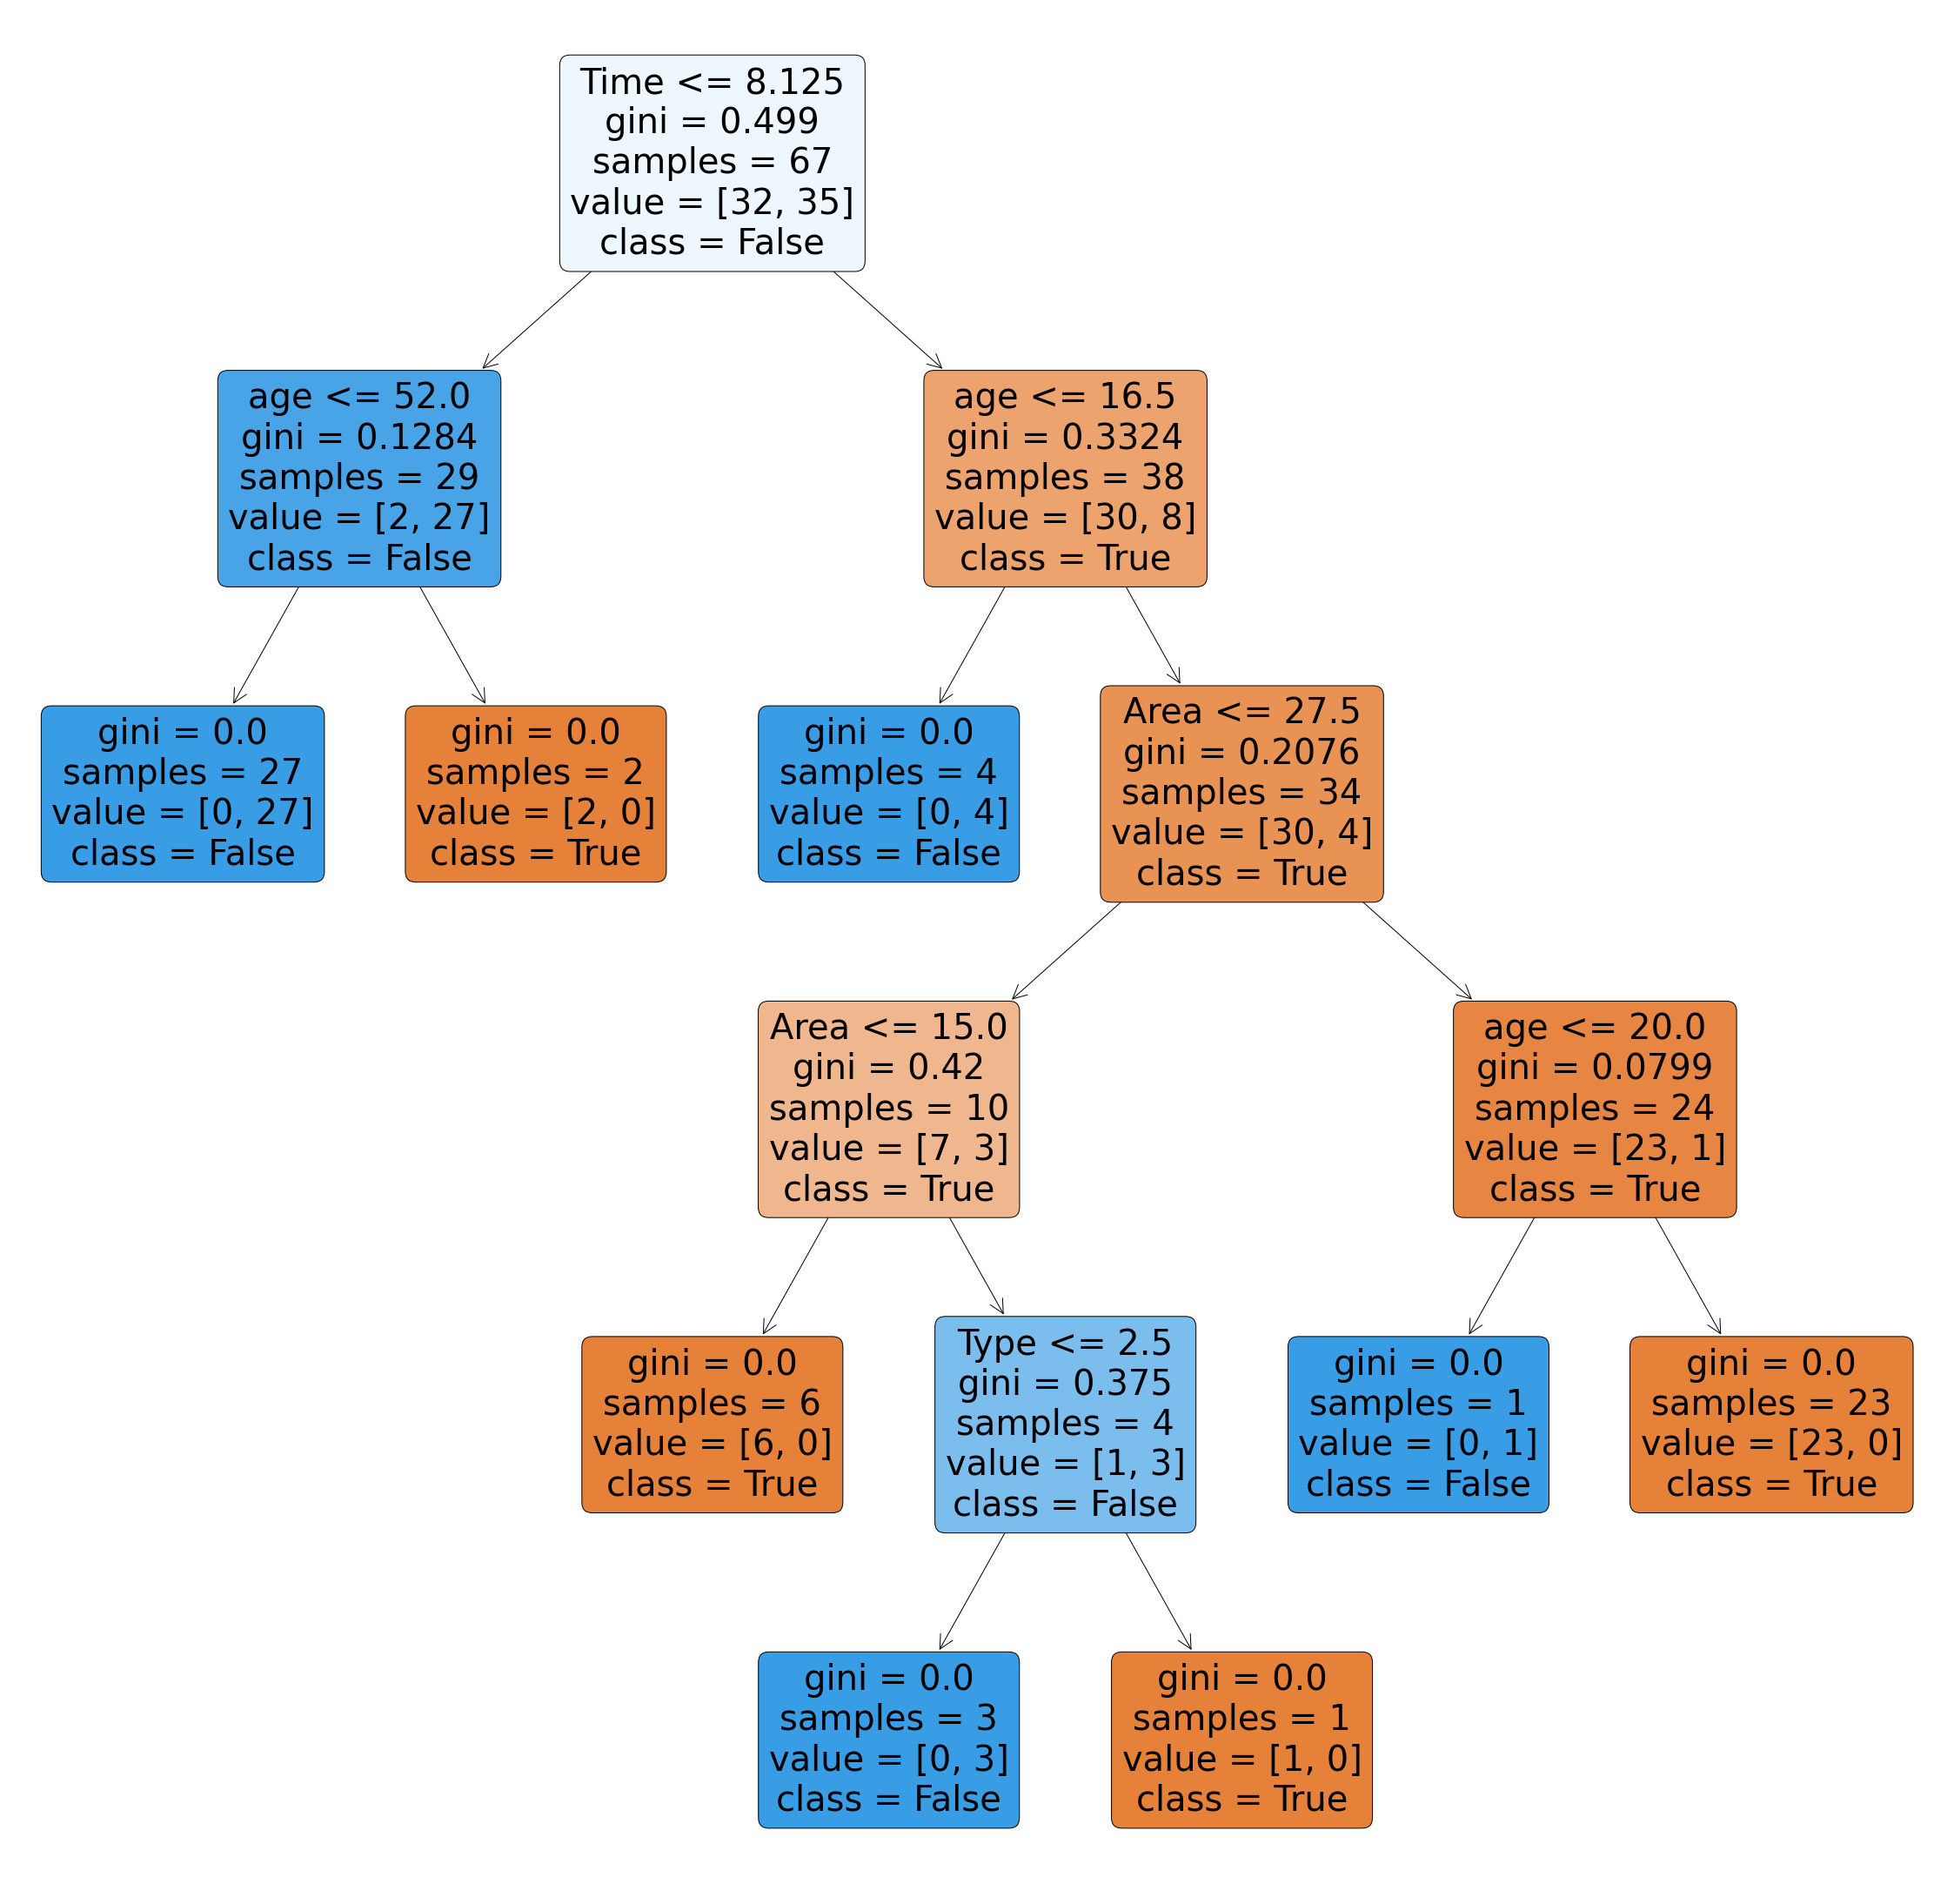

In [7]:
# Step 1: Import the model you want to use
# This was already imported earlier in the notebook so commenting out
#from sklearn.tree import DecisionTreeClassifier
# Step 2: Make an instance of the Model
clf = DecisionTreeClassifier(max_depth = 10, 
                             random_state = 0)
print('DecisionTreeClassifier Created')
# Step 3: Train the model on the data
clf.fit(X_train, Y_train)
# Step 4: Predict labels of unseen (test) data
# Not doing this step in the tutorial
# clf.predict(X_test)

# Visualising the graph without the use of graphvizplt.figure(figsize = (20,20))
# plot tree
plt.figure(figsize=(40,40))  # set plot size (denoted in inches)
dec_tree = plot_tree(decision_tree=clf, feature_names = colms, fontsize=40,
                     class_names =["True", "False"] , filled = True , precision = 4, rounded = True)
plt.show()

#tree.plot_tree(clf, feature_names = colms);

### Predict the values for test data and check the accuracy of decision tree model


In [8]:
# Predicting the values of test data
Y_pred = clf.predict(X_test)
print("Classification report - \n", classification_report(Y_test,Y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.92      0.92      0.92        13

    accuracy                           0.91        23
   macro avg       0.91      0.91      0.91        23
weighted avg       0.91      0.91      0.91        23



### Plot Confusion matrix

Text(0.5, 1.0, 'Accuracy Score: 91.3 %')

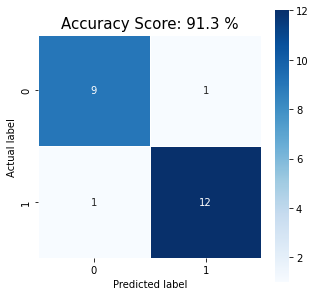

In [9]:
# From the above, our achieved accuracy is around 91%. Lets plot confusion matrix for the same.

cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0} %'.format(round(clf.score(X_test, Y_test),3)*100)
plt.title(all_sample_title, size = 15)

### Perform data for Bayesian Network

Convert contineous values into discrete values. Lets geoup the respactive data into different bins as per decision tree classification. 

In [10]:
age_bins = np.array([df.age.min(),16.5,20,52,df.age.max()])
age_lbs = [1,2,3,4]
print('Age:  '+ str(age_bins))

Time_bins =np.array([df.Time.min(),8.125,df.Time.max()])
Time_lbs = [1,2]
print('Time:  '+ str(Time_bins))

Area_bins = np.array([df.Area.min(),15,27.5,df.Area.max()])
Area_lbs = [1,2,3]
print('Area:  '+ str(Area_bins))

#Type_bins = numpy.array([df.Type.min(),2.5,df.Type.max()])
#Type_lbs = [1,2]
#print('Type:  '+ str(Type_bins))

# As we dont have Number_of_Warts in our decision tree, so we are binning it in 3 distinct groups.
# This attribute is required for the first test data, so we are keeping this data in our final dataset.
wart_bins = np.linspace(df.Number_of_Warts.min(), df.Number_of_Warts.max(), 4)
wart_lbs = [1,2,3]
print('Warts:  '+ str(wart_bins))

Age:  [15.  16.5 20.  52.  67. ]
Time:  [ 0.25   8.125 12.   ]
Area:  [  4.   15.   27.5 750. ]
Warts:  [ 1.          4.66666667  8.33333333 12.        ]


In [11]:
# Bin the data frame by "age" with 4 bins...
#age_bins = np.linspace(df.age.min(), df.age.max(), 4)
#print("Age bin",age_bins)
df['agebinned'] = pd.cut(df['age'], bins=age_bins, labels=age_lbs,include_lowest= True)
#print(df['agebinned'])

# Bin the data frame by "Time" with 4 bins...
#time_bins = np.linspace(df.Time.min(), df.Time.max(), 4)
#print(time_bins)
df['timebinned'] = pd.cut(df['Time'], bins=Time_bins, labels=Time_lbs,include_lowest= True)
#print(df['timebinned'])

# Bin the data frame by "Number_of_Warts" with 4 bins...
#wart_bins = np.linspace(df.Number_of_Warts.min(), df.Number_of_Warts.max(), 4)
#print(wart_bins)
df['wartbinned'] = pd.cut(df['Number_of_Warts'], bins=wart_bins, labels=wart_lbs,include_lowest= True)
#print(df['wartbinned'])

# Bin the data frame by "Area" with 4 bins...
#area_bins = np.linspace(df.Area.min(), df.Area.max(), 4)
#print(area_bins)
df['areabinned'] = pd.cut(df['Area'], bins=Area_bins, labels=Area_lbs,include_lowest= True)
#print(df['areabinned'])

# Bin the data frame by "type" with 4 bins...
#type_bins = np.linspace(df.Type.min(), df.Type.max(), 4)
#print(area_bins)
#labels = [1,2]
#df['Typebinned'] = pd.cut(df['Type'], bins=Type_bins, labels=labels,include_lowest= True)
#print(df['areabinned'])

df.head()

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment,agebinned,timebinned,wartbinned,areabinned
0,1,35,12.00,5,1,100,0,3,2,2,3
1,1,29,7.00,5,1,96,1,3,1,2,3
2,1,50,8.00,1,3,132,0,3,1,1,3
3,1,32,11.75,7,3,750,0,3,2,2,3
4,1,67,9.25,1,1,42,0,4,2,1,3


In [12]:
df.isnull().sum()

sex                    0
age                    0
Time                   0
Number_of_Warts        0
Type                   0
Area                   0
Result_of_Treatment    0
agebinned              0
timebinned             0
wartbinned             0
areabinned             0
dtype: int64

In [13]:
#drop original columns by name
df.drop(['age','Number_of_Warts', 'Area','Time'], axis=1, inplace=True)

print("Dataframe shape after binning and removing the original column",df.shape)
print("Dataframe info after binning and removing the original column \n",df)

Dataframe shape after binning and removing the original column (90, 7)
Dataframe info after binning and removing the original column 
     sex  Type  Result_of_Treatment agebinned timebinned wartbinned areabinned
0     1     1                    0         3          2          2          3
1     1     1                    1         3          1          2          3
2     1     3                    0         3          1          1          3
3     1     3                    0         3          2          2          3
4     1     1                    0         4          2          1          3
..  ...   ...                  ...       ...        ...        ...        ...
85    2     3                    0         3          2          1          3
86    2     1                    1         2          1          2          3
87    2     3                    0         3          2          2          3
88    1     1                    1         3          2          3          2
89    1

In [14]:
df.columns.values

array(['sex', 'Type', 'Result_of_Treatment', 'agebinned', 'timebinned',
       'wartbinned', 'areabinned'], dtype=object)

In [15]:
# Let's reshuffle the dataframe and keep target='Result_of_Treatment' column at last.

df = df[['sex', 'Type', 'agebinned', 'timebinned','wartbinned', 'areabinned','Result_of_Treatment']]
df.head()

,sex,Type,agebinned,timebinned,wartbinned,areabinned,Result_of_Treatment
0,1,1,3,2,2,3,0
1,1,1,3,1,2,3,1
2,1,3,3,1,1,3,0
3,1,3,3,2,2,3,0
4,1,1,4,2,1,3,0


In [16]:
# Import the pomegranate and create the Bayesian Network Module from Datas
from pomegranate import *

edges_dict = {'timebinned': 'agebinned', 'agebinned': 'areabinned', 
        'areabinned':'Type', 'agebinned': 'Result_of_Treatment','Type': 'Result_of_Treatment' ,
        'areabinned': 'Result_of_Treatment' }
edges_list = [(k, v) for k, v in edges_dict.items()]


model = BayesianNetwork.from_samples(df.to_numpy(), root='timebinned', include_edges=edges_list,
                                     state_names=df.columns.values,  algorithm='exact')
#plt.plot()
model.sample()

array([[2, 1, 3, 1, 2, 1, 1]], dtype=int64)

In [17]:
model.bake()
model.fit(df.to_numpy())

{
    "class" : "BayesianNetwork",
    "name" : "2488921979632",
    "structure" : [
        [],
        [
            5
        ],
        [
            6
        ],
        [
            5,
            6
        ],
        [],
        [],
        [
            1
        ]
    ],
    "states" : [
        {
            "class" : "State",
            "distribution" : {
                "class" : "Distribution",
                "dtype" : "numpy.int64",
                "name" : "DiscreteDistribution",
                "parameters" : [
                    {
                        "1" : 0.5222222222222223,
                        "2" : 0.4777777777777778
                    }
                ],
                "frozen" : false
            },
            "name" : "sex",
            "weight" : 1.0
        },
        {
            "class" : "State",
            "distribution" : {
                "class" : "Distribution",
                "name" : "ConditionalProbabilityTable",
                "t

In [18]:
model.predict_proba({})

array([{
           "class" : "Distribution",
           "dtype" : "numpy.int64",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "1" : 0.5222222222222223,
                   "2" : 0.4777777777777778
               }
           ],
           "frozen" : false
       }                                    ,
       {
           "class" : "Distribution",
           "dtype" : "numpy.int64",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "1" : 0.5999999999999996,
                   "2" : 0.1000000000000004,
                   "3" : 0.29999999999999993
               }
           ],
           "frozen" : false
       }                                    ,
       {
           "class" : "Distribution",
           "dtype" : "numpy.int64",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "1" : 0.16666666666666674,
       

In [19]:
# This method will replace the value with bin value of respactive column.

def getbinnedValue(val,binname,binlabel):
    binvalue=(pd.cut([val], bins=binname, labels=binlabel,include_lowest=True))
    print('bin values are '+str(binname)+" the current value belongs to bin -> "+ str(binvalue[0]))
    return binvalue[0]

In [20]:
df.columns

Index(['sex', 'Type', 'agebinned', 'timebinned', 'wartbinned', 'areabinned',
       'Result_of_Treatment'],
      dtype='object')

In [21]:
#Predict whether the treatment was successful or not using the following data:
#Female Patient who is 33 years old with 12 number of type 3 warts.

#Sex=1, considered as female

#sex=1
#age=33         bin values are [15.0  16.5   20.0   52.0   67.0] the current value belongs to bin -> 3
#type=3
#warts=12       bin values are [ 1.0  4.66666667   8.33333333     12.0] the current value belongs to bin -> 3


# Sequence of nodes- 'sex', 'Type', 'agebinned', 'timebinned', 'wartbinned', 'areabinned','Result_of_Treatment'


result_prob_mod=model.predict_proba([[1, 3, getbinnedValue(33,age_bins,age_lbs), None, getbinnedValue(12,wart_bins,wart_lbs), 
                                      None, None]])
print("\nPredicted results are: ")

print("Predict whether the treatment was successful or not - Female Patient who is 33 years old with 12 number of type 3 warts")
print("Probablity of Unsuccess",((((result_prob_mod[0])[6]).parameters)[0])[0])
print("Probablity of Success",((((result_prob_mod[0])[6]).parameters)[0])[1])


print('\n\nComplete output of unknown values (None values from prediction) are as below: ')
print(result_prob_mod)

bin values are [15.  16.5 20.  52.  67. ] the current value belongs to bin -> 3
bin values are [ 1.          4.66666667  8.33333333 12.        ] the current value belongs to bin -> 3

Predicted results are: 
Predict whether the treatment was successful or not - Female Patient who is 33 years old with 12 number of type 3 warts
Probablity of Unsuccess 0.9233576642335763
Probablity of Success 0.07664233576642372


Complete output of unknown values (None values from prediction) are as below: 
[array([1, 3, 3, {
                    "class" : "Distribution",
                    "dtype" : "numpy.int64",
                    "name" : "DiscreteDistribution",
                    "parameters" : [
                        {
                            "1" : 0.18802647719601914,
                            "2" : 0.8119735228039809
                        }
                    ],
                    "frozen" : false
                }                                     , 3,
       {
           "class"

In [22]:

#Sex=1, considered as female
#Infer the probability for the data with the following properties
#A male aged 67 who has type 1 wart in area 51 and had a successful treatment

#sex=2
#age=67      bin values are [15.  16.5  20.0  52.0  67.0] the current value belongs to bin -> 4
#type=1
#warts=12    bin values are [1.0   4.66666667   8.33333333    12.0] the current value belongs to bin -> 3
#area=51 >   bin values are [4.0  252.66666667  501.33333333  750.0] the current value belongs to bin -> 1 


# Sequence of nodes- 'sex', 'Type', 'agebinned', 'timebinned', 'wartbinned', 'areabinned','Result_of_Treatment'

result_infer_prob = model.probability([[2, 1, getbinnedValue(67,age_bins,age_lbs), 
                                           None, getbinnedValue(12,wart_bins,wart_lbs), 
                                           getbinnedValue(51,Area_bins, Area_lbs),1]])

print("\nPredicted result is: ")
print("Infer the probability for the data - A male aged 67 who has type 1 wart in area 51 and had a successful treatment")
print("Probablity is ",result_infer_prob)

bin values are [15.  16.5 20.  52.  67. ] the current value belongs to bin -> 4
bin values are [ 1.          4.66666667  8.33333333 12.        ] the current value belongs to bin -> 3
bin values are [  4.   15.   27.5 750. ] the current value belongs to bin -> 3

Predicted result is: 
Infer the probability for the data - A male aged 67 who has type 1 wart in area 51 and had a successful treatment
Probablity is  0.0


In [23]:
#Find the probability of the patient Age 15, Gender Male, Number of warts 5, Type 2, Area 100 and Treatment unsuccessful.
#model.predict_proba([[sex, Type, Result, agebinned, timebinned, wartbinned, areabinned]])
#Sex=1, considered as female

#sex=2
#age=15 >      bin values are [15.  16.5 20.  52.  67. ] the current value belongs to bin -> 1
#type=2
#warts=5 >     bin values are [ 1.          4.66666667  8.33333333 12.        ] the current value belongs to bin -> 2
#Area=100 >    bin values are [  4.         252.66666667 501.33333333 750.        ] the current value belongs to bin -> 1


# Sequence of nodes- 'sex', 'Type', 'agebinned', 'timebinned', 'wartbinned', 'areabinned','Result_of_Treatment'
result_prob = model.probability([[2, 2, getbinnedValue(15,age_bins,age_lbs), None, getbinnedValue(5,wart_bins,wart_lbs), 
                                  getbinnedValue(100,Area_bins,Area_lbs), 0]])

print("\nPredicted result is: ")
print("Find the probability of the patient - Age 15, Gender Male, Number of warts 5, Type 2, Area 100 and Treatment unsuccessful")
print("Probablity is ",result_prob)

bin values are [15.  16.5 20.  52.  67. ] the current value belongs to bin -> 1
bin values are [ 1.          4.66666667  8.33333333 12.        ] the current value belongs to bin -> 2
bin values are [  4.   15.   27.5 750. ] the current value belongs to bin -> 3

Predicted result is: 
Find the probability of the patient - Age 15, Gender Male, Number of warts 5, Type 2, Area 100 and Treatment unsuccessful
Probablity is  0.0
